In [1]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re
from pandas import read_excel
data=pd.read_csv('/content/drive/MyDrive/Ahsan Thesis/Hate speech/Hate speech/dataset.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
data

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [4]:
data['label'].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

In [5]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [6]:


def remove_tags(string):
    removelist = ""
    result = re.sub('','',string)          #remove HTML tags
    result = re.sub('https://.*','',result)   #remove URLs
    result = result.lower()

    return result
data['tweet']=data['tweet'].apply(lambda cw : remove_tags(cw))

In [7]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['tweet']= data['tweet'].apply(lambda x:remove_punctuation(x))
data.head()

,id,tweet,label
0,1,the cdc currently reports 99031 deaths in gene...,real
1,2,states reported 1121 deaths a small rise from ...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona we have 1524 covid testing l...,real
4,5,populous states can generate large case counts...,real


In [8]:
data.head()

,id,tweet,label
0,1,the cdc currently reports 99031 deaths in gene...,real
1,2,states reported 1121 deaths a small rise from ...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona we have 1524 covid testing l...,real
4,5,populous states can generate large case counts...,real


In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
data.head()

,id,tweet,label
0,1,cdc currently reports 99031 deaths general dis...,real
1,2,states reported 1121 deaths small rise last tu...,real
2,3,politically correct woman almost uses pandemic...,fake
3,4,indiafightscorona 1524 covid testing laborator...,real
4,5,populous states generate large case counts loo...,real


In [11]:
from sklearn.preprocessing import LabelEncoder
reviews = data['tweet'].values
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [12]:
reviews

array(['cdc currently reports 99031 deaths general discrepancies death counts different sources small explicable death toll stands roughly 100000 people today',
       'states reported 1121 deaths small rise last tuesday southern states reported 640 deaths',
       'politically correct woman almost uses pandemic excuse reuse plastic bag',
       ...,
       'post claims covid19 vaccine already developed cause widespread infertility',
       'aamir khan donate 250 cr pm relief cares fund',
       '93 days since last case covid19 acquired locally unknown source total number active cases covid19 new zealand’s managed isolation quarantine facilities 25'],
      dtype=object)

In [13]:
labels

array(['real', 'real', 'fake', ..., 'fake', 'fake', 'real'], dtype=object)

In [14]:
encoded_labels

array([1, 1, 0, ..., 0, 0, 1])

In [15]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, test_size=.20)


In [16]:

# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [17]:
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
import keras
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387601 (1.48 MB)
Trainable params: 387601 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
num_epochs = 10
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    )

Epoch 1/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0530 - accuracy: 0.9864
Epoch 2/10
161/161 [==============================] - 3s 19ms/step - loss: 0.0222 - accuracy: 0.9947
Epoch 3/10
161/161 [==============================] - 3s 22ms/step - loss: 0.0118 - accuracy: 0.9965
Epoch 4/10
161/161 [==============================] - 4s 23ms/step - loss: 0.0069 - accuracy: 0.9979
Epoch 5/10
161/161 [==============================] - 3s 18ms/step - loss: 0.0045 - accuracy: 0.9988
Epoch 6/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 7/10
161/161 [==============================] - 3s 21ms/step - loss: 0.0032 - accuracy: 0.9988
Epoch 8/10
161/161 [==============================] - 4s 28ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 9/10
161/161 [==============================] - 3s 17ms/step - loss: 0.0085 - accuracy: 0.9977
Epoch 10/10
161/161 [==============================] - 3s 19ms/step - loss: 0.0069 - accura

In [20]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

41/41 [==============================] - 1s 6ms/step
Accuracy of prediction on test set :  0.9042056074766355


In [21]:
prediction

array([[3.9692073e-05],
       [7.8597674e-05],
       [2.1138350e-05],
       ...,
       [9.9989223e-01],
       [9.9990177e-01],
       [5.3528772e-04]], dtype=float32)

In [22]:
print(classification_report(test_labels,pred_labels))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       616
           1       0.94      0.88      0.90       668

    accuracy                           0.90      1284
   macro avg       0.91      0.91      0.90      1284
weighted avg       0.91      0.90      0.90      1284



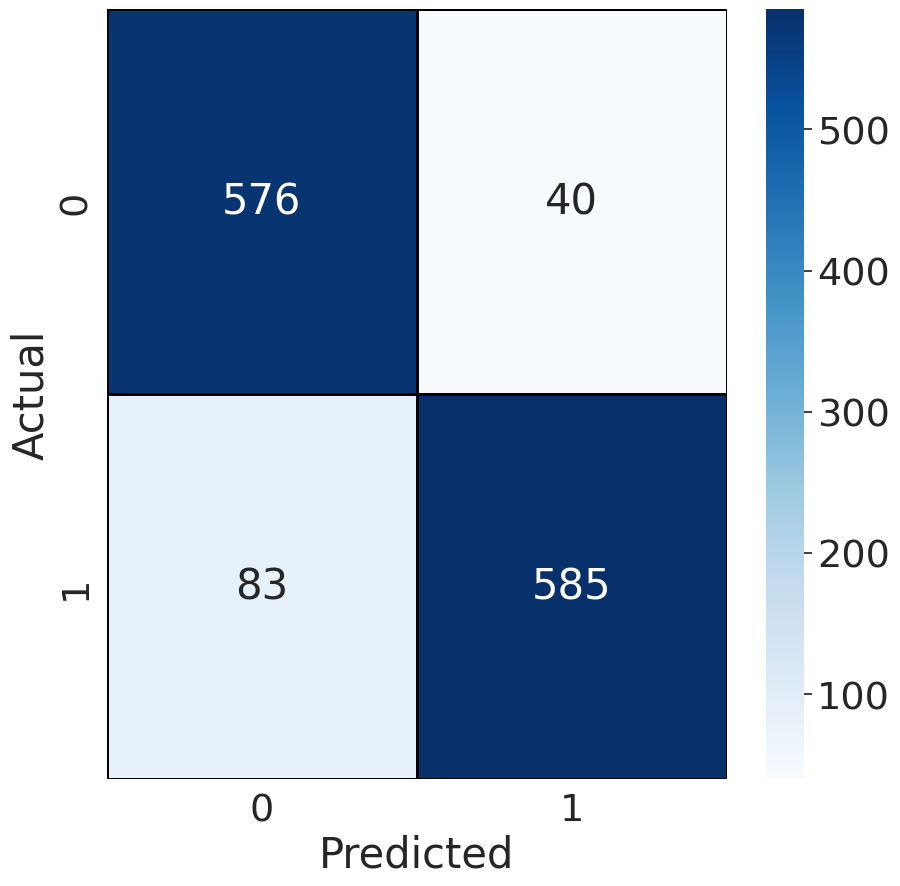

In [24]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels,pred_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(test_labels,pred_labels)
sn.set(font_scale=2.5)